# Finding the right Estimator

In this notebook, we examine how different estimators perform in our prediction pipeline. First, we load the required dependencies and the data.

In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src import configuration as config
from src.pipeline.pipeline_factory import PipelineFactory, ModelType, EvaluationType
from src.pipeline.evaluation.custom_grid_search import custom_grid_search

In [15]:
# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.BASIC
)

scores = {}

***
## 1) Evaluating Estimators

### 1.1) Baseline

In [16]:
from sklearn.dummy import DummyRegressor

pipeline.change_estimator(DummyRegressor())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC


Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.2206 [std=0.]
    validation_mae: 0.1783 [std=0.]
    validation_r2: -0.005 [std=0.]
    validation_average_spearman: 0. [std=0.]


### 1.2) Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

pipeline.change_estimator(LinearRegression())
pipeline.run()

scores['linear_regression'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1514 [std=0.]
    validation_mae: 0.1093 [std=0.]
    validation_r2: 0.5267 [std=0.]
    validation_average_spearman: 0.0895 [std=0.]


### 1.3) SVMs

In [18]:
from sklearn.svm import SVR

pipeline.change_estimator(SVR())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1027 [std=0.]
    validation_mae: 0.078 [std=0.]
    validation_r2: 0.7824 [std=0.]
    validation_average_spearman: 0.1578 [std=0.]


### 1.4) K-Nearest-Neighbours

In [19]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.change_estimator(KNeighborsRegressor())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.1306 [std=0.]
    validation_mae: 0.0748 [std=0.]
    validation_r2: 0.6481 [std=0.]
    validation_average_spearman: 0.3957 [std=0.]


### 1.5) Decision Trees

In [20]:
from sklearn.tree import DecisionTreeRegressor

pipeline.change_estimator(DecisionTreeRegressor())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.07 [std=0.]
    validation_mae: 0.0319 [std=0.]
    validation_r2: 0.899 [std=0.]
    validation_average_spearman: 0.5247 [std=0.]


### 1.6) Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestRegressor

pipeline.change_estimator(RandomForestRegressor())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0606 [std=0.]
    validation_mae: 0.0305 [std=0.]
    validation_r2: 0.9243 [std=0.]
    validation_average_spearman: 0.494 [std=0.]


### 1.7) Light Gradient Boosting Machine

In [22]:
from lightgbm import LGBMRegressor

pipeline.change_estimator(LGBMRegressor())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0635 [std=0.]
    validation_mae: 0.0405 [std=0.]
    validation_r2: 0.9168 [std=0.]
    validation_average_spearman: 0.2962 [std=0.]


### 1.8) Neural Networks

In [23]:
from sklearn.neural_network import MLPRegressor

pipeline.change_estimator(MLPRegressor())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.BASIC
Finished running the pipeline
Evaluation metrics:
    validation_rmse: 0.0956 [std=0.]
    validation_mae: 0.0622 [std=0.]
    validation_r2: 0.8114 [std=0.]
    validation_average_spearman: 0.1545 [std=0.]


***
## 2) Comparing Estimators

In [24]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

display(scores_df)

,baseline,linear_regression,svm,knn,decision_tree,random_forest,lgbm,neural_network
metric,,,,,,,,
rmse,0.220645,0.151411,0.102661,0.130571,0.069953,0.060554,0.063502,0.095589
mae,0.178262,0.109327,0.077968,0.074794,0.031881,0.030453,0.040514,0.062187
r2,-0.004997,0.526748,0.782433,0.648056,0.898984,0.924305,0.916757,0.811376
average_spearman,0.000000,0.089476,0.157757,0.395673,0.524668,0.493989,0.296154,0.154505


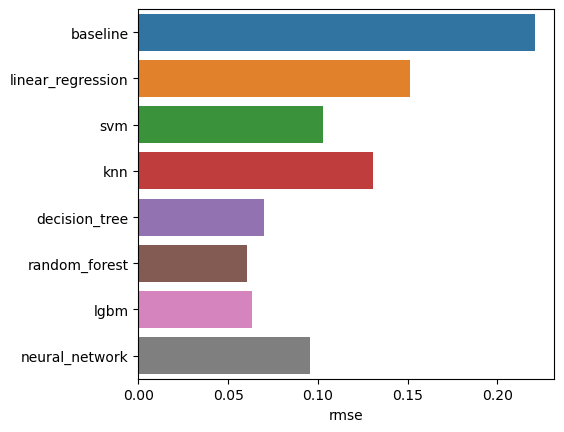

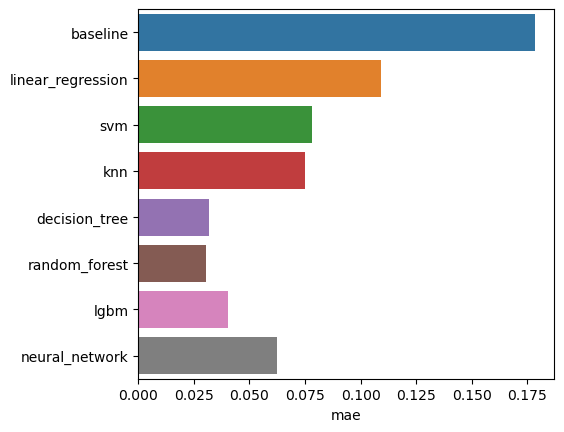

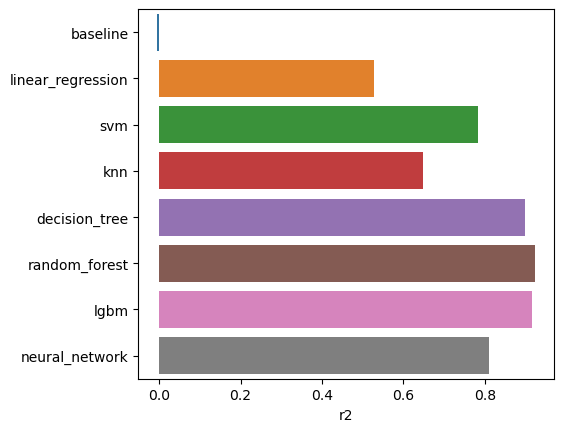

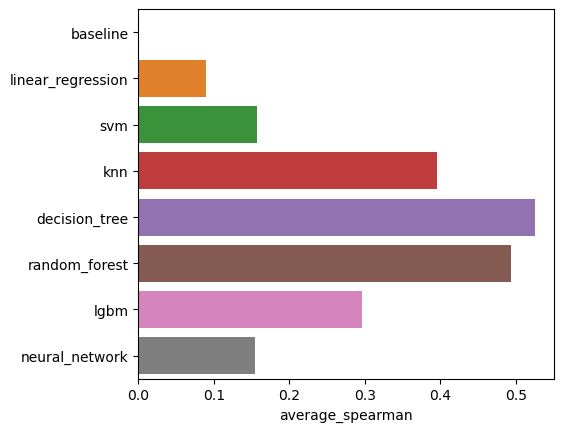

In [25]:
for metric, values in scores_df.iterrows():
    sns.barplot(x=values, y=values.index)
    plt.gcf().subplots_adjust(left=0.25)
    plt.savefig('no_tuning_' + metric + '.svg')
    plt.show()

In our evaluations, the decision tree performed the best regarding the average spearman correlation. Therefore, we will focus on this model in the tuning phase.